<a href="https://colab.research.google.com/github/jorgenery/ufba-mestrado/blob/main/ic0004_trabalho_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import itertools
import numpy as np
import time

## Implementação Algoritmos

### Algoritmo de Força Bruta

In [17]:
# Algoritmo de Força Bruta
def gerar_permutacoes(arr):
    """Gera todas as permutações de um array."""
    if len(arr) == 0:
        return [[]]

    permutacoes = []
    for i in range(len(arr)):
        restante = arr[:i] + arr[i+1:]
        for p in gerar_permutacoes(restante):
            permutacoes.append([arr[i]] + p)

    return permutacoes

def forca_bruta(matriz_distancias, distancia_maxima):
    n = len(matriz_distancias)
    rota_minima = None
    distancia_minima = float('inf')

    # Gera todas as permutações possíveis das cidades (exceto a inicial)
    cidades = list(range(1, n))
    permutacoes = gerar_permutacoes(cidades)

    for perm in permutacoes:
        rota = (0,) + tuple(perm) + (0,)
        distancia = sum(matriz_distancias[rota[i]][rota[i+1]] for i in range(len(rota) - 1))

        if distancia < distancia_minima:
            distancia_minima = distancia
            rota_minima = rota
        if distancia > distancia_maxima:
            continue

    if distancia_minima > distancia_maxima:
        return None, None

    return rota_minima, distancia_minima

### Algoritmo do Vizinho Mais Próximo

In [9]:
# Algoritmo do Vizinho Mais Próximo
def vizinho_mais_proximo(matriz_distancias, cidade_inicial=0, distancia_maxima=float('inf')):
    n = len(matriz_distancias)
    visitadas = [False] * n
    rota = [cidade_inicial]
    distancia_total = 0

    cidade_atual = cidade_inicial
    visitadas[cidade_atual] = True

    for _ in range(n - 1):
        # Encontra a próxima cidade com a menor distância, não visitada
        proxima_cidade = np.argmin([matriz_distancias[cidade_atual][j] if not visitadas[j] else float('inf') for j in range(n)])
        distancia_para_proxima = matriz_distancias[cidade_atual][proxima_cidade]

        # Verifica se adicionar a próxima cidade excede a distância máxima
        if distancia_total + distancia_para_proxima > distancia_maxima:
            return None, None

        distancia_total += distancia_para_proxima
        rota.append(proxima_cidade)
        visitadas[proxima_cidade] = True
        cidade_atual = proxima_cidade

    # Adiciona a distância de volta para a cidade inicial
    distancia_final = matriz_distancias[cidade_atual][cidade_inicial]

    if distancia_total + distancia_final > distancia_maxima:
        return None, None

    distancia_total += distancia_final
    rota.append(cidade_inicial)

    return rota, distancia_total

### Algoritmo Held Karp

In [10]:
def held_karp(distances, max_distance):
    n = len(distances)
    C = {}

    for k in range(1, n):
        C[(1 << k, k)] = (distances[0][k], 0)

    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for k in subset:
                prev_bits = bits & ~(1 << k)
                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev_bits, m)][0] + distances[m][k], m))
                C[(bits, k)] = min(res)

    bits = (2**n - 1) - 1
    res = []
    routes = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + distances[k][0], k))
        routes.append(C[(bits, k)][1])
    opt, parent = min(res)

    return routes,opt

### Colonia de Formigas

In [11]:
# Colônia de Formigas
def colonia_formigas(dist_matrix, max_distance):
  # todo implementar
  return [],0

### Valida certificado

In [12]:
# Valida certificado
def calculate_distance(route, distances):
    return sum(distances[route[i]][route[i+1]] for i in range(len(route)-1)) + distances[route[-1]][route[0]]

### Comparação de Eficiência

In [129]:
def executar_forca_bruta(dist_matrix, max_distance):
    # Algoritmo de Força Bruta
    start_time = time.time()
    rota, distancia = forca_bruta(dist_matrix, max_distance)
    tempo = time.time() - start_time
    quantidade_cidades = len(dist_matrix)
    return ["Força bruta", distancia, tempo, rota, quantidade_cidades ]

def executar_vizinho_mais_proximo(dist_matrix, max_distance):
    # Algoritmo do Vizinho Mais Próximo
    start_time = time.time()
    rota, distancia = vizinho_mais_proximo(dist_matrix,cidade_inicial=0,distancia_maxima=max_distance)
    tempo = time.time() - start_time
    quantidade_cidades = len(dist_matrix)
    return ["Vizinho Mais Próximo", distancia, tempo, rota, quantidade_cidades ]

def executar_held_karp(dist_matrix, max_distance):
    # Algoritmo held_karp
    start_time = time.time()
    rota, distancia = held_karp(dist_matrix, max_distance)
    tempo = time.time() - start_time
    quantidade_cidades = len(dist_matrix)
    return ["Held-Karp", distancia, tempo, rota, quantidade_cidades ]

def executar_colonia_formigas(dist_matrix, max_distance):
    # Algoritmo Colônia de Formigas
    start_time = time.time()
    rota, distancia = colonia_formigas(dist_matrix, max_distance)
    tempo = time.time() - start_time
    quantidade_cidades = len(dist_matrix)
    return ["Colônia de Formigas", distancia, tempo, rota, quantidade_cidades ]

def resultados(matriz_comparacao):
   # Resultados
    for d in matriz_comparacao:
      if d[1] == None or d[1]==0:
        print(f"{d[0]}: Nenhuma resposta valida")
      else:
        print(f"Algoritmo - {d[0]}\t: \tDistância = {d[1]} km \tTempo = {d[2]:.32f} s, \tRota = {d[3]}")

## Experimentos

In [142]:
# Matriz de Distancias Cidades
# Fonte: https://www.melhoresrotas.com/tabela-de-distancias-entre-cidades/br-bahia/
distancias = [
    # Salvador, Feira de Santana, Itabuna, Juazeiro, Camaçari, Barreiras, Ilhéus, Lauro de Freitas, Teixeira de Freitas, Jequié, Porto Seguro, Alagoinhas, Simões Filho, Eunápolis, Paulo Afonso
    [0, 112, 433, 505, 46, 861, 449, 24, 806, 367, 707, 112, 25, 645, 457],  # Salvador
    [115, 0, 348, 394, 98, 748, 364, 110, 721, 254, 623, 75, 89, 560, 377],  # Feira de Santana
    [436, 348, 0, 741, 419, 942, 30, 431, 376, 187, 277, 396, 409, 215, 724],  # Itabuna
    [508, 393, 743, 0, 491, 935, 759, 503, 1_116, 645, 1_017, 445, 482, 955, 364],  # Juazeiro
    [50, 98, 419, 491, 0, 847, 435, 30, 792, 353, 693, 80, 24, 631, 425],  # Camaçari
    [863, 748, 942, 936, 846, 0, 957, 858, 1_185, 793, 1_086, 823, 837, 1_024, 1_124],  # Barreiras
    [452, 364, 30, 757, 435, 955, 0, 447, 405, 203, 307, 412, 426, 244, 740],  # Ilhéus
    [26, 108, 429, 501, 31, 857, 444, 0, 802, 363, 703, 108, 21, 641, 453],  # Lauro de Freitas
    [809, 721, 376, 1_114, 792, 1_185, 405, 804, 0, 560, 225, 769, 783, 163, 1_098],  # Teixeira de Freitas
    [369, 254, 187, 647, 352, 792, 203, 364, 560, 0, 461, 329, 343, 399, 630],  # Jequié
    [711, 623, 277, 1_016, 694, 1_087, 307, 706, 225, 462, 0, 671, 684, 63, 999],  # Porto Seguro
    [116, 76, 396, 446, 77, 824, 412, 105, 769, 330, 670, 0, 88, 608, 346],  # Alagoinhas
    [28, 89, 410, 482, 21, 838, 425, 22, 783, 344, 684, 88, 0, 622, 433],  # Simões Filho
    [648, 560, 214, 953, 631, 1_024, 244, 643, 163, 399, 62, 608, 622, 0, 936],  # Eunápolis
    [462, 378, 728, 367, 423, 1_124, 744, 451, 1_101, 630, 1_002, 347, 434, 940, 0]  # Paulo Afonso
    ]

cidades = [
    "Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas",
    "Jequié", "Porto Seguro", "Alagoinhas", "Simões Filho", "Eunápolis", "Paulo Afonso"
    ]

def get_submatrix(cidades_selecionadas, cidades, distancias):
    """
    Monta a matriz de distância das cidades selecionadas
    """
    # Verificar se todas as cidades estão na lista
    for cidade in cidades_selecionadas:
        if cidade not in cidades:
            raise ValueError(f"A cidade '{cidade}' não está na lista de cidades.")

    # Obter os índices das cidades selecionadas
    indices = [cidades.index(cidade) for cidade in cidades_selecionadas]

    # Criar a submatriz
    submatriz = []
    for i in indices:
        linha = [distancias[i][j] for j in indices]
        submatriz.append(linha)

    return submatriz

lista_roteiros = [
    ["Salvador", "Feira de Santana", "Itabuna"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho"],
    # ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas"],
    # ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro"],
    # ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro", "Eunápolis"],
    # ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro", "Eunápolis", "Jequié"],
    # ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro", "Eunápolis", "Jequié", "Paulo Afonso"]
]

lista_roteiros_2 = [
    ["Salvador", "Feira de Santana", "Itabuna"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro", "Eunápolis"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro", "Eunápolis", "Jequié"],
    ["Salvador", "Feira de Santana", "Itabuna", "Juazeiro", "Camaçari", "Barreiras", "Ilhéus", "Lauro de Freitas", "Teixeira de Freitas", "Simões Filho", "Alagoinhas", "Porto Seguro", "Eunápolis", "Jequié", "Paulo Afonso"]
]

max_distance = 1800
matriz_resultados = []

In [138]:
matriz_roteiro = get_submatrix(["Salvador", "Feira de Santana", "Itabuna"], cidades, distancias)
len(matriz_roteiro)

3

In [131]:
def test_execution(lista_roteiros, algoritmo):
    matriz_comparacao = []
    for roteiro in lista_roteiros:
        matriz_roteiro = get_submatrix(roteiro, cidades, distancias)
        dado = algoritmo(matriz_roteiro, 80000)
        matriz_comparacao.append(dado)
        matriz_resultados.append(dado)
    resultados(matriz_comparacao)

In [143]:
test_execution(lista_roteiros, executar_forca_bruta)
test_execution(lista_roteiros_2, executar_held_karp)

Algoritmo - Força bruta	: 	Distância = 896 km 	Tempo = 0.00000000000000000000000000000000 s, 	Rota = (0, 1, 2, 0)
Algoritmo - Força bruta	: 	Distância = 1682 km 	Tempo = 0.00000000000000000000000000000000 s, 	Rota = (0, 2, 3, 1, 0)
Algoritmo - Força bruta	: 	Distância = 1714 km 	Tempo = 0.00000000000000000000000000000000 s, 	Rota = (0, 4, 2, 3, 1, 0)
Algoritmo - Força bruta	: 	Distância = 2894 km 	Tempo = 0.00199866294860839843750000000000 s, 	Rota = (0, 4, 2, 6, 5, 3, 1, 0)
Algoritmo - Força bruta	: 	Distância = 2901 km 	Tempo = 0.01200032234191894531250000000000 s, 	Rota = (0, 2, 6, 5, 3, 1, 4, 7, 0)
Algoritmo - Força bruta	: 	Distância = 3523 km 	Tempo = 0.09840750694274902343750000000000 s, 	Rota = (0, 1, 3, 5, 8, 2, 6, 4, 7, 0)
Algoritmo - Força bruta	: 	Distância = 3524 km 	Tempo = 0.93754315376281738281250000000000 s, 	Rota = (0, 9, 6, 2, 8, 5, 3, 1, 4, 7, 0)
Algoritmo - Held-Karp	: 	Distância = 896 km 	Tempo = 0.00000000000000000000000000000000 s, 	Rota = [2, 1]
Algoritmo - Hel

In [133]:
matriz_resultados

[['Força bruta', 896, 0.0, (0, 1, 2, 0), 3],
 ['Força bruta', 1682, 0.0, (0, 2, 3, 1, 0), 4],
 ['Força bruta', 1714, 0.0, (0, 4, 2, 3, 1, 0), 5],
 ['Força bruta', 2894, 0.0019981861114501953, (0, 4, 2, 6, 5, 3, 1, 0), 7],
 ['Força bruta', 2901, 0.011000394821166992, (0, 2, 6, 5, 3, 1, 4, 7, 0), 8],
 ['Força bruta', 3523, 0.09181356430053711, (0, 1, 3, 5, 8, 2, 6, 4, 7, 0), 9],
 ['Força bruta',
  3524,
  0.8997001647949219,
  (0, 9, 6, 2, 8, 5, 3, 1, 4, 7, 0),
  10],
 ['Força bruta',
  3578,
  15.509956121444702,
  (0, 9, 6, 2, 8, 5, 3, 1, 10, 4, 7, 0),
  11],
 ['Força bruta',
  3704,
  206.50187230110168,
  (0, 9, 6, 2, 11, 8, 5, 3, 1, 10, 4, 7, 0),
  12],
 ['Held-Karp', 896, 0.0, [2, 1], 3],
 ['Held-Karp', 1682, 0.0, [3, 1, 1], 4],
 ['Held-Karp', 1714, 0.0, [3, 1, 1, 1], 5],
 ['Held-Karp', 2894, 0.0010004043579101562, [3, 6, 5, 1, 3, 2], 7],
 ['Held-Karp', 2901, 0.0, [3, 6, 5, 1, 3, 2, 4], 8],
 ['Held-Karp', 3523, 0.0010216236114501953, [3, 6, 5, 1, 8, 2, 4, 2], 9],
 ['Held-Karp', 352

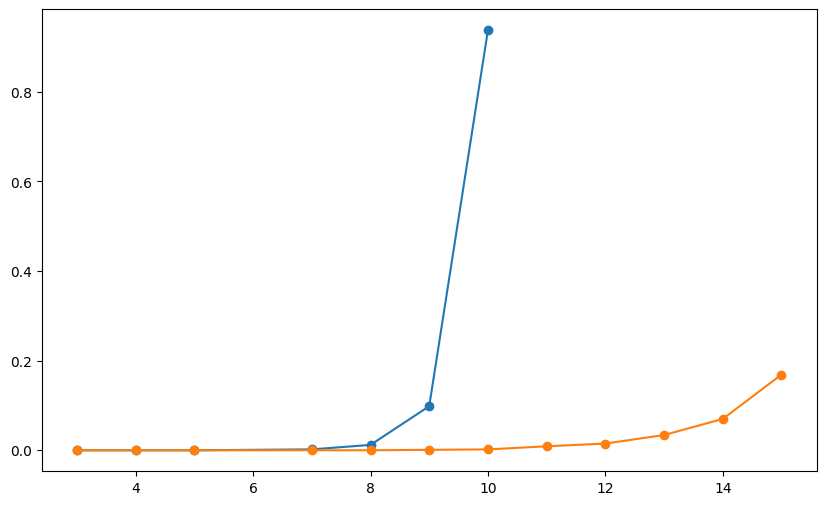

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df = pd.DataFrame(matriz_resultados)
for algoritmo in df[0].unique():
    subset = df[df[0] == algoritmo]
    plt.plot(subset[4], subset[2], marker='o', label=algoritmo)

In [135]:
df = pd.DataFrame(matriz_resultados)
df

,0,1,2,3,4
0,Força bruta,896,0.000000,"(0, 1, 2, 0)",3
1,Força bruta,1682,0.000000,"(0, 2, 3, 1, 0)",4
2,Força bruta,1714,0.000000,"(0, 4, 2, 3, 1, 0)",5
3,Força bruta,2894,0.001998,"(0, 4, 2, 6, 5, 3, 1, 0)",7
4,Força bruta,2901,0.011000,"(0, 2, 6, 5, 3, 1, 4, 7, 0)",8
5,Força bruta,3523,0.091814,"(0, 1, 3, 5, 8, 2, 6, 4, 7, 0)",9
6,Força bruta,3524,0.899700,"(0, 9, 6, 2, 8, 5, 3, 1, 4, 7, 0)",10
7,Força bruta,3578,15.509956,"(0, 9, 6, 2, 8, 5, 3, 1, 10, 4, 7, 0)",11
8,Força bruta,3704,206.501872,"(0, 9, 6, 2, 11, 8, 5, 3, 1, 10, 4, 7, 0)",12
9,Held-Karp,896,0.000000,"[2, 1]",3
